# Nb-20180308-1230-TickerPlot

Refactor ticker plot from previous notebook entry. This is based on https://matplotlib.org/1.5.1/examples/pylab_examples/finance_work2.html

- Refactor git repository: move finance.py and related files to new repository, remove from fastai-dl1 repo
- Migrate ticker plot from notebook to finance.py

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.colors as colors
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

In [12]:
import finance as fat

In [13]:
# Change the plot size.
plt.rcParams['figure.figsize'] = [18.0, 10.0]

In [14]:
def relative_strength(prices, n=14):
    """
    compute the n period relative strength indicator
    http://stockcharts.com/school/doku.php?id=chart_school:glossary_r#relativestrengthindex
    http://www.investopedia.com/terms/r/rsi.asp
    """

    deltas = np.diff(prices)
    seed = deltas[:n+1]
    up = seed[seed >= 0].sum()/n
    down = -seed[seed < 0].sum()/n
    rs = up/down
    rsi = np.zeros_like(prices)
    rsi[:n] = 100. - 100./(1. + rs)

    for i in range(n, len(prices)):
        delta = deltas[i - 1]  # cause the diff is 1 shorter

        if delta > 0:
            upval = delta
            downval = 0.
        else:
            upval = 0.
            downval = -delta

        up = (up*(n - 1) + upval)/n
        down = (down*(n - 1) + downval)/n

        rs = up/down
        rsi[i] = 100. - 100./(1. + rs)

    return rsi

In [17]:
ticker = 'TLT'
df = fat.get_price_data(ticker)

Loaded data for TLT: 2002-07-30 to 2018-03-07.


In [18]:
df['RSI'] = relative_strength(df['Close'])

In [19]:
df_rsi = pd.DataFrame(df['RSI'])

In [20]:
df_macd = fat.create_macd_df(df, 'Close')

In [21]:
sma_df = fat.create_sma_df(df, 'Close', [20,200])
del sma_df['Close']
sma_df.tail()

,Close SMA20,Close SMA200
Date,,
2018-03-01,118.634499,124.65765
2018-03-02,118.516999,124.64185
2018-03-05,118.439499,124.61560
2018-03-06,118.310999,124.58920
2018-03-07,118.213499,124.56070


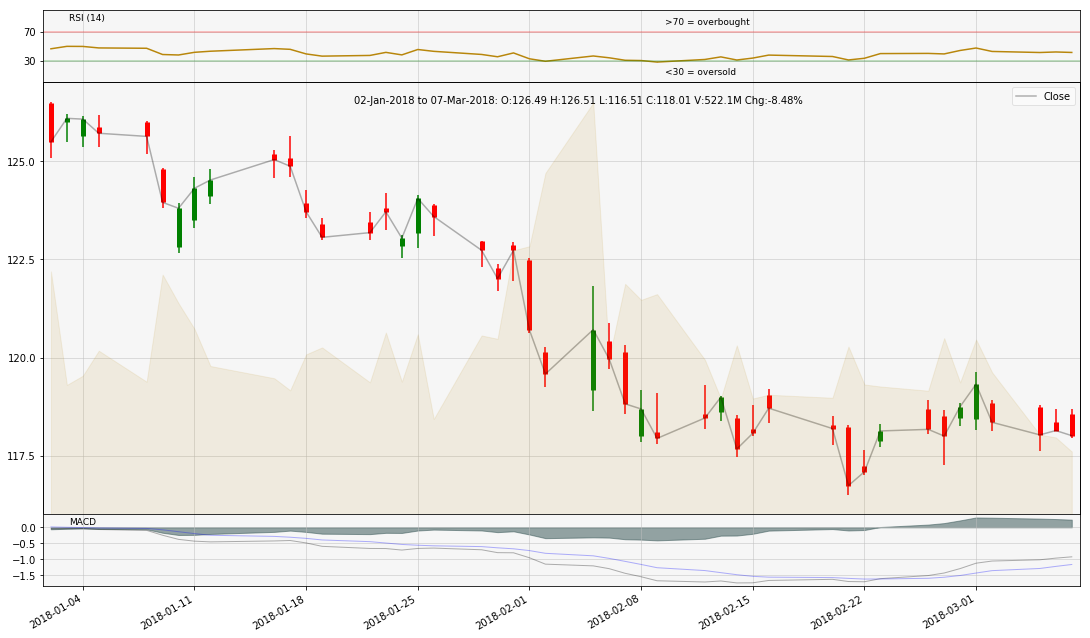

In [28]:
#df = df['2017-03-07':'2018-02-01']
plot_df = df['2018-01-01':'2018-03-07']
fat.plot_daily_ticker(plot_df, macd_df=df_macd, rsi_df=df_rsi)
#fat.plot_daily_ticker(plot_df, title=f'{ticker} Daily', macd_df=df_macd, overlays_df=sma_df)
#fat.plot_daily_ticker(plot_df)